In [2]:
import thinkstats2

In [3]:
pmf = thinkstats2.Pmf([1,2,2,3,5])

In [4]:
pmf

Pmf({1: 0.2, 2: 0.4, 3: 0.2, 5: 0.2})

In [5]:
pmf.Prob(2)

0.4

In [6]:
pmf[2]

0.4

In [7]:
pmf.Incr(2, 0.2)

In [8]:
pmf.Prob(2)

0.6000000000000001

In [9]:
pmf.Mult(2, 0.5)

In [10]:
pmf.Prob(2)

0.30000000000000004

In [11]:
pmf.Total()

0.8999999999999999

In [13]:
pmf.Normalize()

0.8999999999999999

In [14]:
pmf.Total()

1.0

In [16]:
import thinkplot

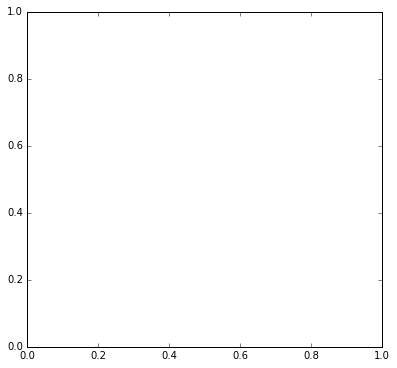

In [18]:
thinkplot.PrePlot(2, cols=2)

In [35]:
width = 1
import nsfg
preg = nsfg.ReadFemPreg()
live   = preg[preg.outcome == 1]

# 第一子
firsts = live[live.birthord == 1]
first_hist = thinkstats2.Hist(firsts.prglngth)
first_pmf = thinkstats2.Pmf(first_hist)

# 第二子
other = live[live.birthord != 1]
other_hist = thinkstats2.Hist(other.prglngth)
other_pmf = thinkstats2.Pmf(other_hist)

/Users/gennei/.pyenv/versions/3.5.1/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


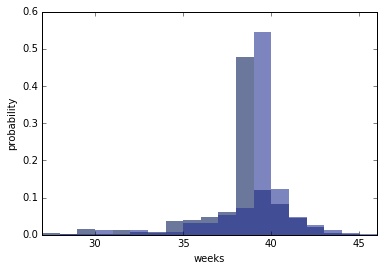

In [36]:
thinkplot.Hist(first_pmf,   align='right', width=width)
thinkplot.Hist(other_pmf, align='left',   width=width)
thinkplot.Config(xlabel='weeks',
                             ylabel='probability',
                             axis=[27,46,0,0.6])

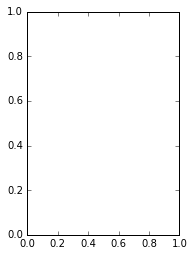

In [30]:
thinkplot.PrePlot(2)
thinkplot.SubPlot(2)

/Users/gennei/.pyenv/versions/3.5.1/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


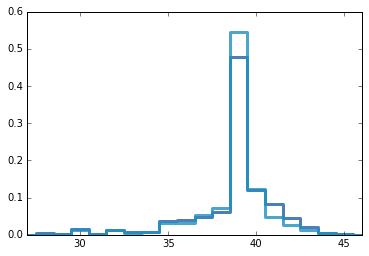

In [37]:
thinkplot.Pmfs([first_pmf, other_pmf])
thinkplot.Show(xlabels='weeks', axis=[27,46,0,0.6])

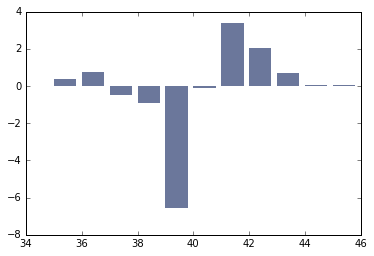

In [40]:
weeks = range(35,46)
diffs = []
for week in weeks:
    p1 = first_pmf.Prob(week)
    p2 = other_pmf.Prob(week)
    diff = 100 * (p1 - p2)
    diffs.append(diff)
    
thinkplot.Bar(weeks, diffs)